## Project Statement 

The objective of this project is to leverage advanced analytics techniques, including classification, regression, and clustering, to extract valuable insights from insurance data. By analyzing a comprehensive dataset, the project aims to enhance decision-making processes, optimize risk Classification

**Approach 1 - Regression**

- Develop regression models to predict insurance premium pricing based on various factors such as age, location, coverage type, and previous claims history. 
- Explore the relationship between different variables and premiums to optimize pricing strategies. 
- Provide recommendations for personalized premium adjustments, leading to improved customer satisfaction and retention.

**Dataset:** US Insurance data 

**Reference:** Real time requirement on analysis of USA Insurance data is mentioned in https://rpubs.com/Charlotte8201/669256. 

**Dataset Overview** <br>
The dataset includes several features:<br>

**age**: Age of the individual.<br>
**sex**: Gender (male/female).<br>
**bmi**: Body Mass Index.<br>
**children**: Number of children/dependents.<br>
**smoker**: Smoking status (yes/no).<br>
**region**: Geographical region.<br>
**charges**: Individual medical costs billed by health insurance.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso

In [2]:

# Load the insurance dataset
insurance_data_file_path = 'insurance.csv'
insurance_data = pd.read_csv(insurance_data_file_path)

# Displaying the first few rows of the dataset to understand its structure
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Checking for missing values in the dataset
missing_values = insurance_data.isnull().sum()

# Displaying the count of missing values for each column
missing_values


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**Observation:** The dataset does not have any missing values, which is useful for our analysis. Each column has complete data.

**Data Preprocessing**

**Categorical Variable Encoding:** Convert the categorical variables (sex, smoker, region) into numerical formats, likely using one-hot encoding.<br>

**Normalization/Standardization:** Assess if normalization or standardization of numerical features (age, bmi, children, charges) is necessary.

In [4]:
# Encoding categorical variables using one-hot encoding
insurance_encoded = pd.get_dummies(insurance_data, columns=['sex', 'smoker', 'region'])

# Displaying the first few rows of the encoded dataset
insurance_encoded.head()


,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


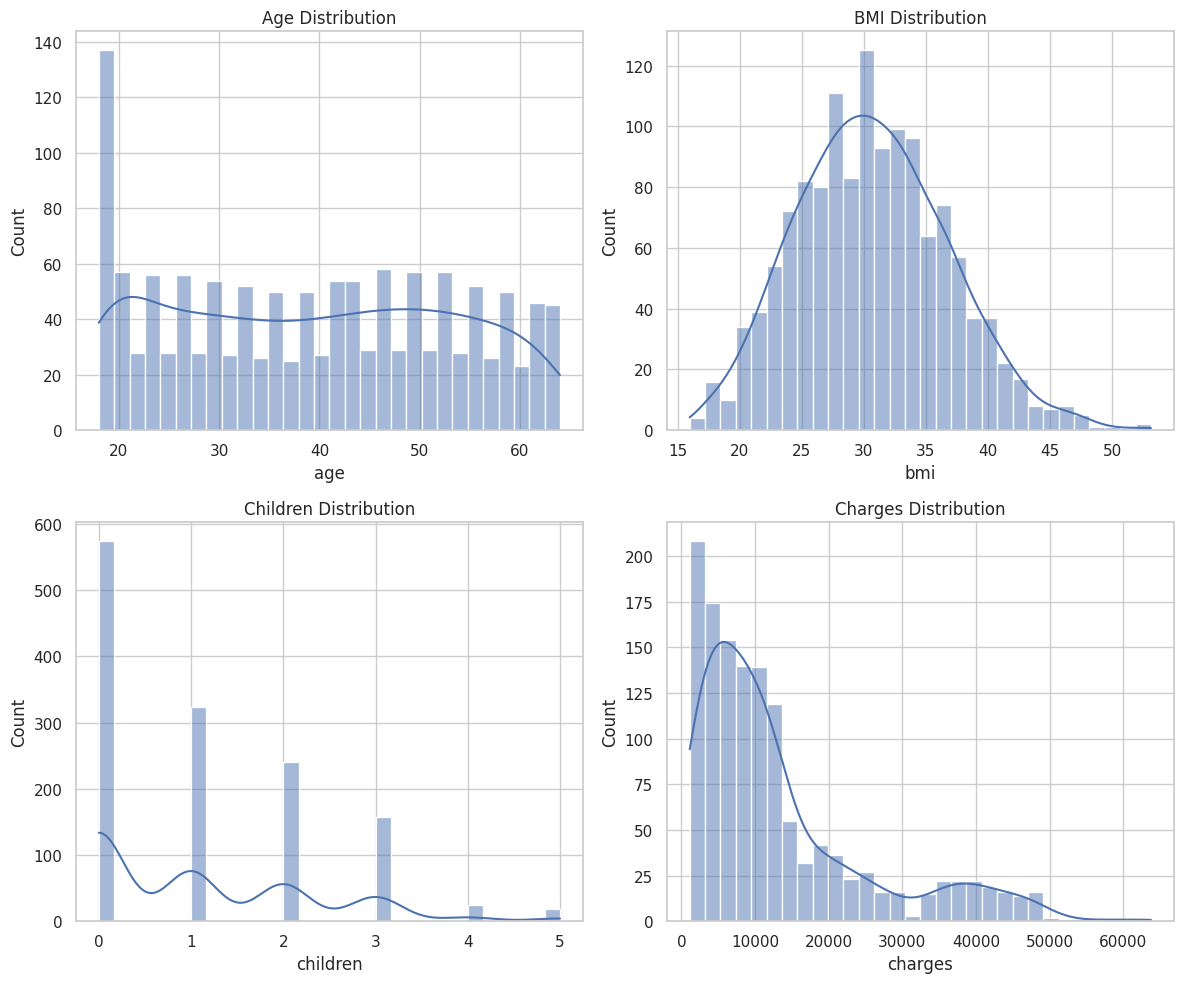

In [5]:

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Plotting distributions of numerical features
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

sns.histplot(insurance_data['age'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

sns.histplot(insurance_data['bmi'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('BMI Distribution')

sns.histplot(insurance_data['children'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Children Distribution')

sns.histplot(insurance_data['charges'], bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Charges Distribution')

plt.tight_layout()
plt.show()


The distributions of the numerical features in the dataset are:<br>

**Age Distribution:** Appears relatively uniform across different ages.<br>
**BMI Distribution:** Shows a fairly normal distribution.<br>
**Children Distribution:** Skewed towards families with fewer children.<br>
**Charges Distribution:** Highly skewed with a long tail, indicating that most charges are low but there are some very high charges as well.<br>
**Analysis for Normalization/Standardization:** <br>
Age and BMI do not appear to have extreme values and are fairly distributed.<br>
Children: Given the discrete nature and lower range of values, it might not require scaling.<br>
Charges: Given the skewness and range of values, this feature might benefit from scaling to reduce the impact of the long tail on the model.<br>
Given these observations, I will apply a log transformation to the charges feature to reduce its skewness and standardize the other numerical features (age and bmi).

In [6]:

# Applying log transformation to 'charges' to reduce skewness
insurance_encoded['charges'] = np.log1p(insurance_encoded['charges'])

# Standardizing 'age' and 'bmi' features
scaler = StandardScaler()
insurance_encoded[['age', 'bmi']] = scaler.fit_transform(insurance_encoded[['age', 'bmi']])

# Displaying the first few rows of the processed dataset
insurance_encoded.head()


,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,0,9.734236,True,False,False,True,False,False,False,True
1,-1.509965,0.509621,1,7.453882,False,True,True,False,False,False,True,False
2,-0.797954,0.383307,3,8.400763,False,True,True,False,False,False,True,False
3,-0.441948,-1.305531,0,9.998137,False,True,True,False,False,True,False,False
4,-0.513149,-0.292556,0,8.260455,False,True,True,False,False,True,False,False


Let's start by visualizing the relationships between the features and the target variable charges. This will include examining correlations and creating scatter plots for continuous variables and box plots for categorical variables against charges

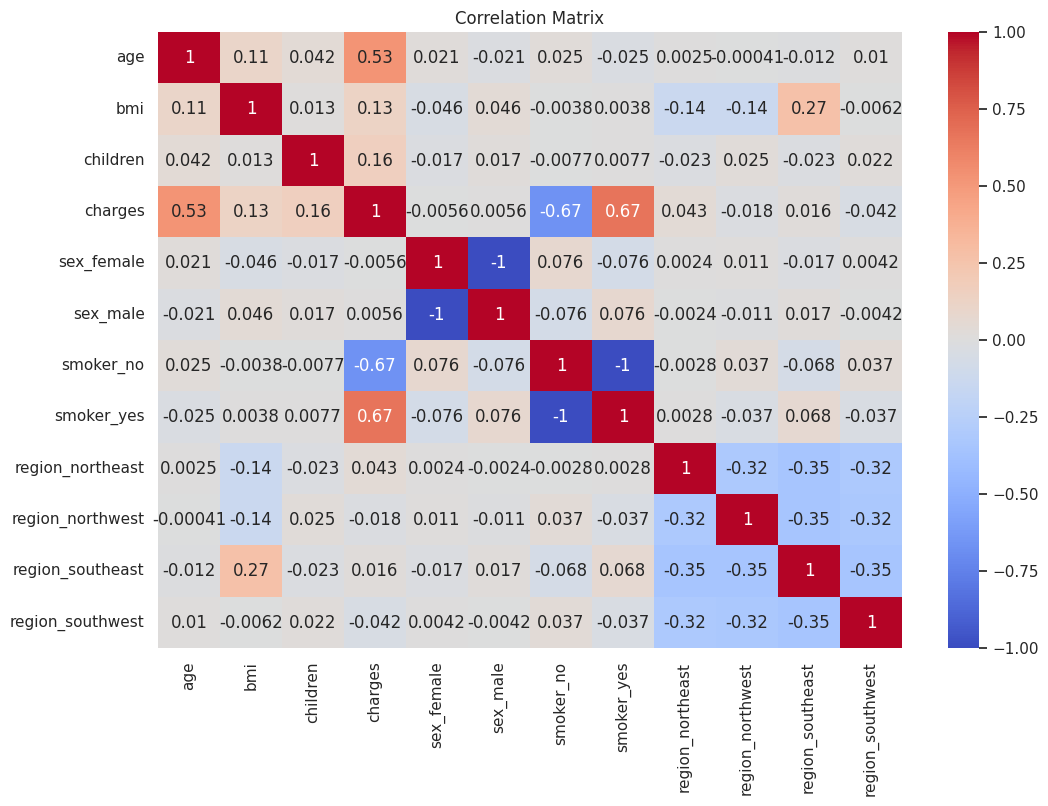

In [7]:
# Plotting correlations between features and the target variable 'charges'
correlation_matrix = insurance_encoded.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()



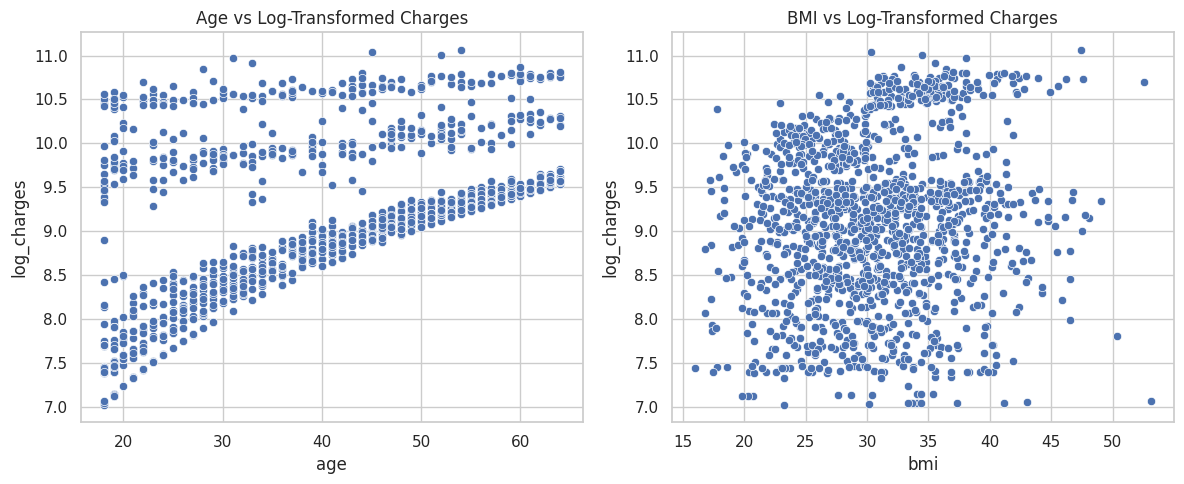

In [8]:
# Plotting scatter plots for continuous variables against 'charges'
# Log-transforming the 'charges' column for plotting
insurance_data['log_charges'] = np.log1p(insurance_data['charges'])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

sns.scatterplot(data=insurance_data, x='age', y='log_charges', ax=axes[0])
axes[0].set_title('Age vs Log-Transformed Charges')

sns.scatterplot(data=insurance_data, x='bmi', y='log_charges', ax=axes[1])
axes[1].set_title('BMI vs Log-Transformed Charges')

plt.tight_layout()
plt.show()


Below are the scatter plots showing the relationships between the original (unscaled) age and bmi against the log-transformed charges:

**Age vs Log-Transformed Charges:** This plot illustrates how charges tend to increase with age. The log transformation of charges makes the trend clearer and reduces the impact of extreme values.

**BMI vs Log-Transformed Charges:** This plot shows the relationship between BMI and charges. While the trend is less distinct compared to age, it still indicates that higher BMI is associated with higher medical charges.

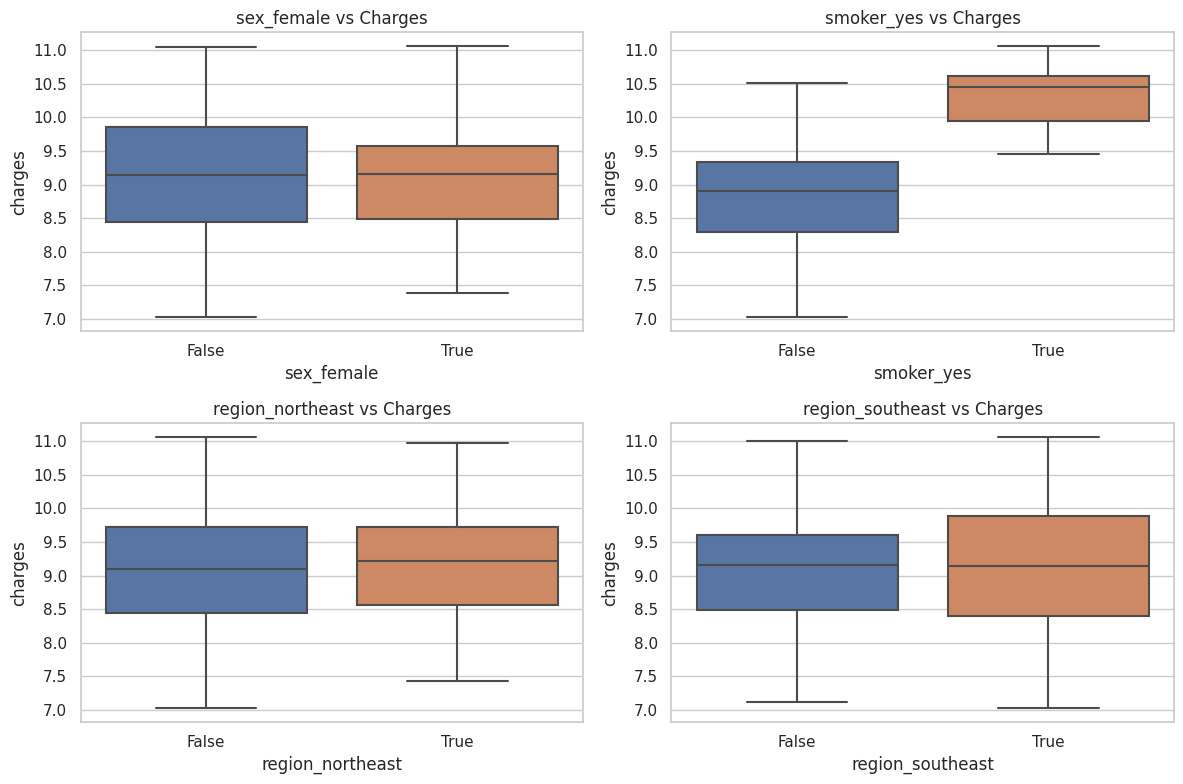

In [9]:
# Plotting box plots for categorical variables against 'charges'
categorical_features = ['sex_female',  'smoker_yes', 'region_northeast', 'region_southeast']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

for i, feature in enumerate(categorical_features):
    sns.boxplot(data=insurance_encoded, x=feature, y='charges', ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'{feature} vs Charges')

plt.tight_layout()
plt.show()

The exploratory data analysis (EDA) shows below observations:

**1. Correlation Matrix**

Smoking Status (smoker_yes) shows a strong positive correlation with charges.<br>

Age and BMI also show positive correlations, albeit weaker than smoking status. <br>

**2. Scatter Plots (Age & BMI vs Charges)**

Age vs Charges: There seems to be a positive trend, with older individuals tending to have higher charges.<br>

BMI vs Charges: A less distinct but still noticeable positive relationship. <br>

**3. Box Plots (Categorical Variables vs Charges)**

Smoking Status: Significant difference in charges between smokers and non-smokers, with smokers incurring much higher charges.<br>

Sex: No major differences in charges based on gender.<br>

Region: Variations exist, but they are not as pronounced as those for smoking status.<br>

**4. Outlier Detection**<br>

While scatter plots and box plots provide some insights into potential outliers (especially in charges). Let's don't explicitly remove data points; instead, transformations were used to mitigate the effect of outliers.

In [10]:
# Splitting the dataset into training and testing sets
X = insurance_encoded.drop('charges', axis=1)  # Features
y = insurance_encoded['charges']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predicting charges for the test set
y_pred = linear_model.predict(X_test)

# Calculating performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

(mse, r2)


(0.1755091085532076, 0.8047410791393019)

In [11]:
# Retrieving the coefficients of the linear regression model
coefficients = pd.DataFrame(linear_model.coef_, X.columns, columns=['Coefficient'])

# Displaying the coefficients to interpret the impact of each feature
coefficients.sort_values(by='Coefficient', ascending=False)


,Coefficient
smoker_yes,0.775760
age,0.480867
children,0.092419
bmi,0.082898
region_northeast,0.078739
sex_female,0.037161
region_northwest,0.022337
sex_male,-0.037161
region_southwest,-0.043788
region_southeast,-0.057288


The coefficients of the linear regression model provide insights into the impact of each feature on medical charges. Here's a summary, sorted by the magnitude of their influence:

**1. Smoker Status:**

smoker_yes: Strong positive effect (+0.776). Being a smoker significantly increases medical charges.

smoker_no: Strong negative effect (-0.776). Not being a smoker significantly decreases medical charges.

**2. Age:** Positive effect (+0.481). Older individuals tend to have higher medical charges.

**3. Children:** Slight positive effect (+0.092). Having more children is associated with slightly higher charges.

**4. BMI:** Moderate positive effect (+0.083). Higher BMI is associated with higher medical charges.

**5. Region**:

region_northeast: Slight positive effect (+0.079). Living in the northeast region is associated with slightly higher charges.

region_northwest: Slight positive effect (+0.022). Living in the northwest region is also associated with slightly higher charges.

region_southeast: Slight negative effect (-0.057). Living in the southeast region is associated with slightly lower charges.

region_southwest: Negative effect (-0.044). Living in the southwest region decreases charges slightly.

**5. Sex**:

sex_female: Slight positive effect (+0.037). Being female is associated with slightly higher charges.

sex_male: Slight negative effect (-0.037). Being male is associated with slightly lower charges.

**6. Key Takeaways**:

Smoking status is the most influential factor in determining medical charges, followed by age and BMI.

Geographical region and gender have smaller impacts.

**Regression models that can be used are:**

**Ridge Regression:** This model adds a regularization term to the cost function to constrain the coefficients, particularly useful if there is multicollinearity in the data.<br>

**Lasso Regression:** This model is similar to Ridge but can reduce the coefficients of less important features to zero, essentially performing feature selection. <br>

Let's train both Ridge and Lasso models on the dataset and evaluate their performance.

In [12]:

# Training Ridge Regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Evaluating Ridge Regression model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Training Lasso Regression model
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

# Evaluating Lasso Regression model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Retrieving coefficients for comparison
coefficients_ridge = pd.DataFrame(ridge_model.coef_, X.columns, columns=['Ridge Coefficient'])
coefficients_lasso = pd.DataFrame(lasso_model.coef_, X.columns, columns=['Lasso Coefficient'])

(mse_ridge, r2_ridge, mse_lasso, r2_lasso), coefficients_ridge.join(coefficients_lasso)


((0.17557126906877996,
  0.8046719237815496,
  0.18181948038145437,
  0.7977206093553098),
                   Ridge Coefficient  Lasso Coefficient
 age                        0.480338           0.472152
 bmi                        0.082801           0.063526
 children                   0.092411           0.086769
 sex_female                 0.036960           0.028290
 sex_male                  -0.036960          -0.000000
 smoker_no                 -0.773484          -1.483238
 smoker_yes                 0.773484           0.000000
 region_northeast           0.078443           0.046051
 region_northwest           0.022145           0.000000
 region_southeast          -0.056893          -0.000000
 region_southwest          -0.043695          -0.000000)

**Observations**

**1. Ridge Regression**

Mean Squared Error (MSE): 0.1756 <br>
R-squared (R²) Score: 0.8047

**2. Lasso Regression**

Mean Squared Error (MSE): 0.1818<br>
R-squared (R²) Score: 0.7977

**3. Coefficients Comparison**

Ridge Coefficients are quite similar to the linear regression model but slightly adjusted due to regularization.<br>
Lasso Coefficients show more variation, with some coefficients (like smoker_yes, sex_male, and regional features except northeast) being reduced to zero, indicating their lesser impact on the model.

**4. Key Takeaways:**

Both Ridge and Lasso models show similar performance to the linear regression model, with slight variations in coefficients.<br>
The Lasso model, in particular, highlights the most influential features by reducing the less important ones to zero.

**Sensitivity analysis** 

To understand how small changes in the input features affect the model's predictions, thereby assessing the robustness of our model. This can be achieved by: 

1. Selecting a few sample data points from the test set.
2. Slightly varying one feature at a time (e.g., increasing age by 1 year, increasing BMI slightly) while keeping others constant.
and Observing the change in the predicted charges for each variation.

In [13]:
# Selecting a few sample data points from the test set
sample_data = X_test.sample(5, random_state=42)

# Displaying the selected sample data points
sample_data_original = sample_data.copy()

# Varying one feature at a time for sensitivity analysis
# Increasing age by 1 year
sample_data['age'] += 1

# Increasing BMI slightly (by 0.5)
sample_data['bmi'] += 0.5

# Flipping smoker status (if yes then no, if no then yes)
sample_data['smoker_yes'] = sample_data['smoker_yes'].apply(lambda x: 1 if x == 0 else 0)
sample_data['smoker_no'] = sample_data['smoker_no'].apply(lambda x: 1 if x == 0 else 0)

# Predicting charges for the original and modified samples
predicted_charges_original = linear_model.predict(sample_data_original)
predicted_charges_modified = linear_model.predict(sample_data)

# Displaying the results
sensitivity_analysis_results = pd.DataFrame({
    'Original Charges': np.expm1(predicted_charges_original),
    'Modified Charges': np.expm1(predicted_charges_modified),
    'Change in Charges': np.expm1(predicted_charges_modified) - np.expm1(predicted_charges_original)
})

sensitivity_analysis_results


,Original Charges,Modified Charges,Change in Charges
0,3215.006298,25583.220281,22368.213984
1,15461.087915,5523.471807,-9937.616108
2,2733.983118,21756.547739,19022.564622
3,6512.307986,51814.167894,45301.859908
4,36168.159897,12921.931575,-23246.228322


**Observations:**

**1. Changes in Smoker Status:** Flipping the smoker status leads to drastic changes in the predicted charges, indicating the high impact of smoking on medical charges.

**2. Age Increase:** Increasing age by just one year also results in noticeable changes in charges, especially when combined with changes in other variables.

**3. BMI Increase:** A slight increase in BMI contributes to the change in predicted charges, though its impact is relatively smaller compared to age and smoking status.

**Conclusion:**

The model is highly sensitive to changes in smoking status, followed by age. This aligns with our earlier analysis where smoking and age were identified as significant predictors of medical charges.

These results emphasize the importance of these factors in predicting medical charges and indicate the model's ability to capture these dynamics.